# Data Exploration

## Imports

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
%matplotlib inline

## Reading CSV

In [9]:
train_df = pd.read_csv("Data/train.csv")
print(train_df.shape)
train_df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
test_df = pd.read_csv("Data/test.csv")

In [4]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data For description of columns

### Visualizing Sales Price through a violin plot

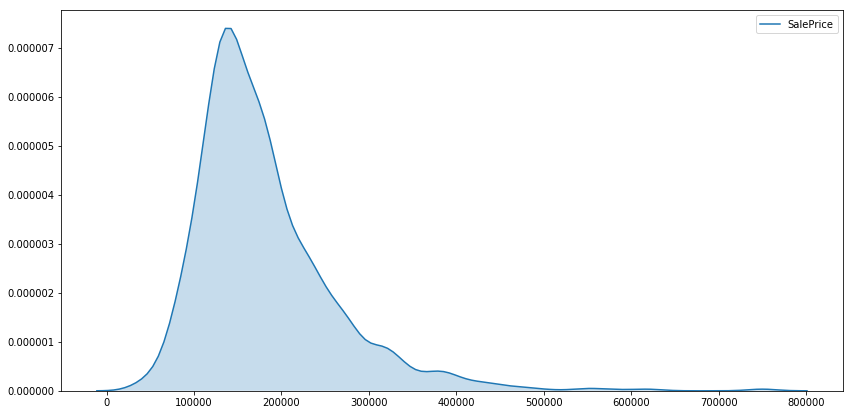

In [16]:
plt.figure(figsize=(14,7))
sns.kdeplot(train_df.SalePrice, shade=True)

In [12]:
train_df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [14]:
train_df.SalePrice.skew()

1.8828757597682129

We can see high positive skew in our data (>1)

This can be reduced by performing log transformation on the data. This improves linearity of our data

New Skew:  0.12133506220520406


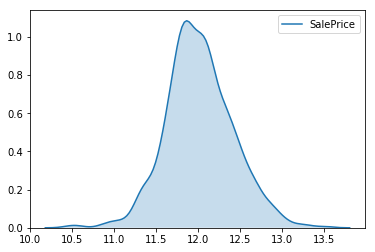

In [18]:
target = np.log(train_df.SalePrice)
print("New Skew: ", target.skew())
sns.kdeplot(target, shade=True)

Important to take exponential of final output to convert back to proper form

### Finding high correlation features

In [25]:
numeric_features = train_df.select_dtypes(include=[np.number])

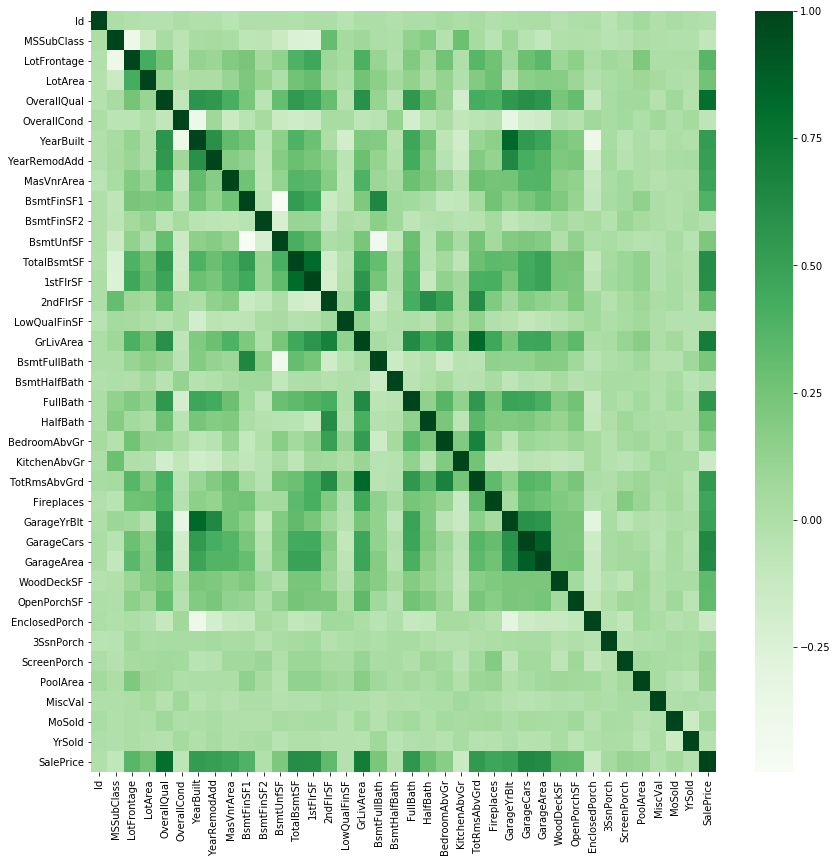

In [27]:
corr = numeric_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, cmap='Greens')

In [32]:
print(corr.SalePrice.sort_values(ascending=False)[:6])
print()
print(corr.SalePrice.sort_values()[:5])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
Name: SalePrice, dtype: float64

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
Name: SalePrice, dtype: float64


### Relationship between OverallQual (Overall material and finish quality) and SalePrice

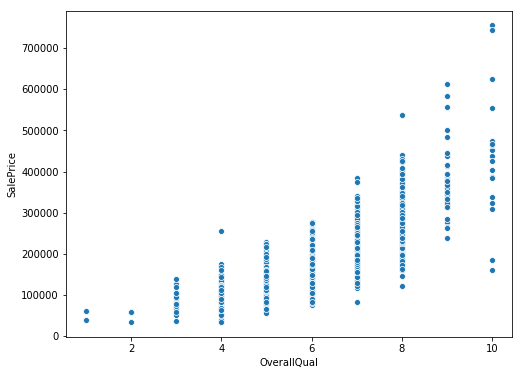

In [34]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = train_df.OverallQual, y = train_df.SalePrice)

We can see an increasing pattern between these variables

### Relationship between GrLivArea (Above ground living area in Sq Ft) and SalePrice

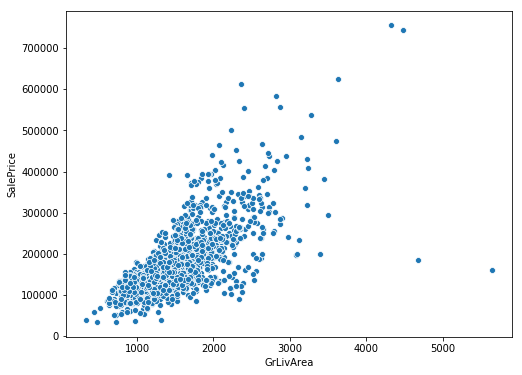

In [19]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = train_df.GrLivArea, y = train_df.SalePrice)

We can see that sales price and square footage are closely related